In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
df.head()


Dataset Loaded Successfully
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


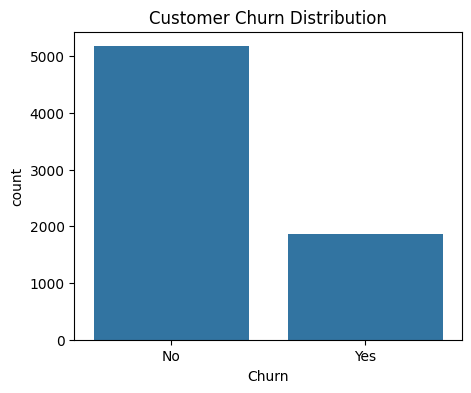

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


In [15]:
import numpy as np

# Clean column names
df.columns = df.columns.str.strip()

# Handle TotalCharges safely
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop missing values
df = df.dropna()

# Drop customerID ONLY if it exists
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

print("Data Cleaning completed successfully ✅")
df.head()


Data Cleaning completed successfully ✅


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df = pd.get_dummies(df, drop_first=True)

print("Encoding completed")
print("New shape:", df.shape)


Encoding completed
New shape: (7032, 31)


In [17]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

print("Before SMOTE:\n", y.value_counts())


Before SMOTE:
 Churn_Yes
False    5163
True     1869
Name: count, dtype: int64


In [18]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:\n", y_resampled.value_counts())


After SMOTE:
 Churn_Yes
False    5163
True     5163
Name: count, dtype: int64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



--- Logistic Regression ---
Accuracy: 0.8373668925459826
              precision    recall  f1-score   support

       False       0.83      0.84      0.84      1037
        True       0.84      0.83      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))



--- Decision Tree ---
Accuracy: 0.7971926427879962
              precision    recall  f1-score   support

       False       0.81      0.78      0.80      1037
        True       0.79      0.81      0.80      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [22]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

loss, nn_accuracy = model.evaluate(X_test, y_test)

print("\n--- Neural Network ---")
print("Accuracy:", nn_accuracy)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6593 - loss: 0.5984 - val_accuracy: 0.8160 - val_loss: 0.3912
Epoch 2/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4131 - val_accuracy: 0.8317 - val_loss: 0.3607
Epoch 3/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.3879 - val_accuracy: 0.8462 - val_loss: 0.3434
Epoch 4/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.3680 - val_accuracy: 0.8475 - val_loss: 0.3359
Epoch 5/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8283 - loss: 0.3786 - val_accuracy: 0.8475 - val_loss: 0.3283
Epoch 6/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8317 - loss: 0.3596 - val_accuracy: 0.8596 - val_loss: 0.3277
Epoch 7/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8439 - loss: 0.3527 - val_accuracy: 0.8487 - val_loss: 0.3228
Epoch 8/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.3675 - val_accuracy: 0.

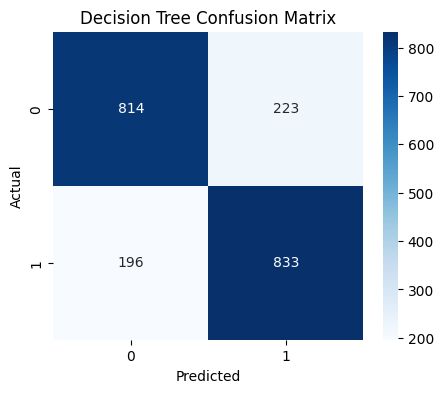

In [23]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


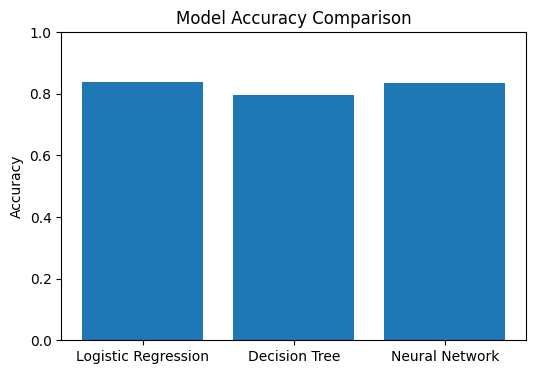

In [24]:
models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    nn_accuracy
]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [25]:
print("\nConclusion:")
print("SMOTE successfully handled class imbalance. Decision Tree and Neural Network performed well for churn prediction.")



Conclusion:
SMOTE successfully handled class imbalance. Decision Tree and Neural Network performed well for churn prediction.
